# Implementing Naive Bayes Classifier Using Python

In [1]:
import pandas as pd
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays
from sklearn.preprocessing import StandardScaler

# import plotly.express as px  # for data visualization
# import plotly.graph_objects as go # for data visualization

# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

## Importing the data

In [2]:
data = pd.read_csv('iphone_purchase_records.csv')
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


## EDA

In [3]:
# getting an overall idea of the data set
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [4]:
# checking for any null value
data.isna().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

<AxesSubplot: >

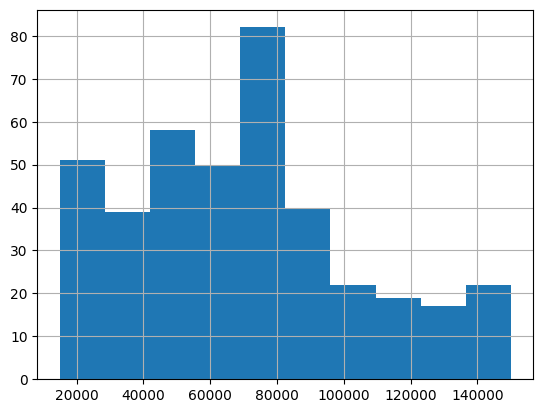

In [7]:
# Check for outliers
# data['Age'].hist()
data['Salary'].hist()

In [8]:
# Checking for correlations
data.corr()

/var/folders/py/5qw9j86x1hg0nfb52t6zsz580000gn/T/ipykernel_915/1413067713.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


## Preprocessing

In [9]:
# Creating a copy of dataset and working on that
df_preprocessed = data.copy(deep=True)
df_preprocessed.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [10]:
# Filling Missing Data
# Skipping it since we don't have any

In [11]:
# Handling categorical values
df_preprocessed = pd.get_dummies(df_preprocessed,columns = ['Gender'])
df_preprocessed = df_preprocessed[['Gender_Female','Gender_Male','Age','Salary','Purchase Iphone']]
df_preprocessed.head()

,Gender_Female,Gender_Male,Age,Salary,Purchase Iphone
0,0,1,19,19000,0
1,0,1,35,20000,0
2,1,0,26,43000,0
3,1,0,27,57000,0
4,0,1,19,76000,0


In [12]:
df_preprocessed.corr()

,Gender_Female,Gender_Male,Age,Salary,Purchase Iphone
Gender_Female,1.000000,-1.000000,0.073741,0.060435,0.042469
Gender_Male,-1.000000,1.000000,-0.073741,-0.060435,-0.042469
Age,0.073741,-0.073741,1.000000,0.155238,0.622454
Salary,0.060435,-0.060435,0.155238,1.000000,0.362083
Purchase Iphone,0.042469,-0.042469,0.622454,0.362083,1.000000


In [13]:
# Feature scaling 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

df_preprocessed[['Age','Salary']]=scaler.fit_transform(df_preprocessed[['Age','Salary']])
df_preprocessed.head()

,Gender_Female,Gender_Male,Age,Salary,Purchase Iphone
0,0,1,0.023810,0.029630,0
1,0,1,0.404762,0.037037,0
2,1,0,0.190476,0.207407,0
3,1,0,0.214286,0.311111,0
4,0,1,0.023810,0.451852,0


## Applying Classification Algorithms

### Naive Bayes Algorithms
Family of probabilistic algorithms

#### Theory

##### Overview 
<img src="https://uc-r.github.io/public/images/analytics/naive_bayes/naive_bayes_icon.png">

##### Assumptions
1. All the feature are equal contributor
2. All features are independent

#### Types of Naive Bayes Classifiers
1. <b>Gausian Naive Bayes</b><br>
    It supportes continuous feature which follow Gaussian (normal) distribution, e.g if we have take 'Age' and 'Salary' which are continuous variable and 'Purhcased Iphone' as Target, then we can use Gaussian Naive Bayes. Note: Feature are continous but not the target.

2. <b>Bernoulli Naive Bayes</b><br>
    It is used when all the features are in Binary or having just 2 classes, e.g if we have taken 'Gender' as our feature and 'Purchased Iphone' as target.
    Another example is to classify if a text is spam or not, for each word we create a column (feature) and mark 1 if word is present in text else 0 as our feature and have target variable as "Spam" or "Not Spam" (1/0)

In [19]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# loading the iris dataset
iris = datasets.load_iris()

# X -> features, y -> label
X = iris.data
y = iris.target

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.5,)

# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)


0.9466666666666667


In [20]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [30]:

# Function that handles sample splitting, model fitting and report printing 
def mfunc(X, y, typ):
    
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Fit the model
    model = typ
    clf = model.fit(X_train, y_train)

    # Predict class labels on a test data
    pred_labels = model.predict(X_test)

    # Print model attributes 
    print('Classes: ', clf.classes_) # class labels known to the classifier
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) # prior probability of each class.
    else: 
        print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.
        
    # Use score method to get accuracy of the model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels))
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, pred_labels

X=df_preprocessed[['Age','Salary','Gender_Female','Gender_Male']]
y=df_preprocessed['Purchase Iphone'].values

# scaler = StandardScaler()
# x_std = scaler.fit_transform(df_preprocessed[['Age','Salary']])
# X = x_std
# y = df_preprocessed['Purchase Iphone'].values

# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X, y, GaussianNB())

Classes:  [0 1]
Class Priors:  [0.63571429 0.36428571]
--------------------------------------------------------
Accuracy Score:  0.9
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        79
           1       0.89      0.80      0.85        41

    accuracy                           0.90       120
   macro avg       0.90      0.88      0.89       120
weighted avg       0.90      0.90      0.90       120

